# 1. Introduction

Dans ce notebook, je vais réaliser une Exploratory Data Analysis sur les données des gagnants du Tour de France de 1903 à 2023<br>

<img src="https://www.underconsideration.com/brandnew/archives/tour_de_france_logo.png" style="width:600px; height:500px;" alt="Logo TDF">


Remarque : j'ai pris certaines decisions lors du nettoyage qui peuvent etre différentes pour vous selon votre stratégie. Aussi cette EDA peut être complétée, réduite ou égalée selon votre besoin.
Bonne lecture 
Anthony RENARD🦊

Données disponibles sous https://www.kaggle.com/datasets/gulliverwoods/tour-de-france-winner-data/data

# 2. Démarche méthodologique

Chargement des données -> Nettoyage -> Analyse 

# 3. Exploration des données

## <a name="C31">3.1 Chargement<a>

### <a name="C2311">3.1.1 Importation des librairies utiles et options<a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#Pour eviter de tronquer les listes affichées car le dataset est important en terme de taille
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### <a name="C312">3.1.2 Les fonctions</a>

#### <a name="C3121">3.1.2.1 Rapport Corrélation - ANOVA </a>

In [3]:
def eta_squared(x,y):
    moyenne_x = x.mean()
    classes = []
    for classe in y.unique():
        xi_classe = x[y==classe]
        classes.append({'ni': len(xi_classe),'moyenne_classe': xi_classe.mean()})
    SCT = sum([(xj-moyenne_x)**2 for xj in x])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_x)**2 for c in classes])
    return SCE/SCT

#### <a name="C3122">3.1.2.2  Corrélation  </a>

In [4]:
def correlation(df) :
    corr = df.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))
    plt.subplots(figsize=(30, 15))
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": 0.5});

#### <a name="C3123">3.1.2.3  Affichage des manquants   </a>

In [5]:
def affichage_manquants(df) :
    nb_na = df.isnull().sum() 
    nb_na=nb_na[nb_na>0]

    #Création d'un dataframe avec les manquants
    df_miss=pd.DataFrame(nb_na).reset_index()
    df_miss.columns=['colonne','quantite_manquante']
    df_miss.sort_values('quantite_manquante', ascending= False, inplace=True)

    #Ajout du % de manquants
    df_miss['% manquant'] = round((df_miss['quantite_manquante']/df.shape[0])*100,2)
    df_miss.reset_index(drop=True, inplace=True)
    display(df_miss)

#### <a name="C3124">3.1.2.4  chi02  </a>

In [6]:
def chi02(df, X,Y):
    cont = df[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
    display(cont)
    tx = cont.loc[:,["Total"]]
    ty = cont.loc[["Total"],:]
    n = len(df)
    indep = tx.dot(ty) / n

    c = cont.fillna(0) # On remplace les valeurs nulles par 0
    measure = (c-indep)**2/indep
    xi_n = measure.sum().sum()
    table = round(measure/xi_n,2)
    #sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
    #plt.show()
    sns.heatmap(table.iloc[:-1,:-1],annot=True)
    plt.show()

### <a name="C313">3.1.3 Chargement des données provenant du fichier CSV</a>

In [7]:
df_tour_winners_data_1=pd.read_csv('./input/Tour_Winners_data_1.csv')
df_tour_winners_data_2=pd.read_csv('./input/Tour_Winners_data_2.csv')
df_tour_winners_data_3=pd.read_csv('./input/Tour_Winners_data_3.csv')


In [8]:
#Création d'une copie pour récupérer les informations d'origines si necessaire\n"
df_twd1=df_tour_winners_data_1.copy()
df_twd2=df_tour_winners_data_2.copy()
df_twd3=df_tour_winners_data_3.copy()

## 3.2 Présentation de la structure

### <a name="C321">3.2.1 Nombre de lignes/colonnes et types</a>

In [9]:
print("df_twd1")
df_twd1.info()
print(df_twd1.dtypes)
display(df_twd1)

df_twd1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      110 non-null    int64  
 1   Tour_No                   110 non-null    int64  
 2   Winner                    110 non-null    object 
 3   Country                   110 non-null    object 
 4   Team                      110 non-null    object 
 5   Tour_overall_length_(km)  110 non-null    object 
 6   age                       110 non-null    int64  
 7   BMI                       70 non-null     float64
 8   weight_(Kg)               71 non-null     float64
 9   height_(m)                70 non-null     float64
 10  rider_type_(PPS)          110 non-null    object 
 11  close_rider_type_(PPS)    48 non-null     object 
dtypes: float64(3), int64(3), object(6)
memory usage: 10.4+ KB
Year                          int64
Tour_No           

,Year,Tour_No,Winner,Country,Team,Tour_overall_length_(km),age,BMI,weight_(Kg),height_(m),rider_type_(PPS),close_rider_type_(PPS)
0,2023,110,Jonas Vingegaard,Denmark,Team Jumbo Visma,3406,25,19.6,60.0,1.749636,climber,NaN
1,2022,109,Jonas Vingegaard,Denmark,Team Jumbo Visma,3328,25,19.6,60.0,1.749636,climber,NaN
2,2021,108,Tadej Pogacar,Slovenia,UAE Team Emirates,3383,22,21.3,66.0,1.760282,climber,NaN
3,2020,107,Tadej Pogacar,Slovenia,UAE Team Emirates,3482,21,21.3,66.0,1.760282,climber,NaN
4,2019,106,Egan Bernal,Colombia,Team Ineos,3366,22,19.6,60.0,1.749636,climber,NaN
5,2018,105,Geraint Thomas,United Kingdom,Team Sky,3349,32,21.2,71.0,1.830043,climber,time trial
6,2017,104,Chris Froome,United Kingdom,Team Sky,3540,36,19.9,69.0,1.862079,climber,time trial
7,2016,103,Chris Froome,United Kingdom,Team Sky,3529,35,19.9,69.0,1.862079,climber,time trial
8,2015,102,Chris Froome,United Kingdom,Team Sky,3354,34,19.9,69.0,1.862079,climber,time trial
9,2014,101,Vincenzo Nibali,Italy,Astana Pro Team,3664,29,20.1,65.0,1.798286,climber,NaN


In [10]:
print("df_twd1")
df_twd1.info()
print(df_twd1.dtypes)
display(df_twd1)

df_twd1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      110 non-null    int64  
 1   Tour_No                   110 non-null    int64  
 2   Winner                    110 non-null    object 
 3   Country                   110 non-null    object 
 4   Team                      110 non-null    object 
 5   Tour_overall_length_(km)  110 non-null    object 
 6   age                       110 non-null    int64  
 7   BMI                       70 non-null     float64
 8   weight_(Kg)               71 non-null     float64
 9   height_(m)                70 non-null     float64
 10  rider_type_(PPS)          110 non-null    object 
 11  close_rider_type_(PPS)    48 non-null     object 
dtypes: float64(3), int64(3), object(6)
memory usage: 10.4+ KB
Year                          int64
Tour_No           

,Year,Tour_No,Winner,Country,Team,Tour_overall_length_(km),age,BMI,weight_(Kg),height_(m),rider_type_(PPS),close_rider_type_(PPS)
0,2023,110,Jonas Vingegaard,Denmark,Team Jumbo Visma,3406,25,19.6,60.0,1.749636,climber,NaN
1,2022,109,Jonas Vingegaard,Denmark,Team Jumbo Visma,3328,25,19.6,60.0,1.749636,climber,NaN
2,2021,108,Tadej Pogacar,Slovenia,UAE Team Emirates,3383,22,21.3,66.0,1.760282,climber,NaN
3,2020,107,Tadej Pogacar,Slovenia,UAE Team Emirates,3482,21,21.3,66.0,1.760282,climber,NaN
4,2019,106,Egan Bernal,Colombia,Team Ineos,3366,22,19.6,60.0,1.749636,climber,NaN
5,2018,105,Geraint Thomas,United Kingdom,Team Sky,3349,32,21.2,71.0,1.830043,climber,time trial
6,2017,104,Chris Froome,United Kingdom,Team Sky,3540,36,19.9,69.0,1.862079,climber,time trial
7,2016,103,Chris Froome,United Kingdom,Team Sky,3529,35,19.9,69.0,1.862079,climber,time trial
8,2015,102,Chris Froome,United Kingdom,Team Sky,3354,34,19.9,69.0,1.862079,climber,time trial
9,2014,101,Vincenzo Nibali,Italy,Astana Pro Team,3664,29,20.1,65.0,1.798286,climber,NaN


In [11]:
print("df_twd2")
df_twd2.info()
print(df_twd2.dtypes)
display(df_twd2)

df_twd2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Year                          110 non-null    int64 
 1   Tour_No                       110 non-null    int64 
 2   Winner                        110 non-null    object
 3   pre_tour_GC_wins              110 non-null    int64 
 4   pre_tour_wins                 110 non-null    int64 
 5   total_completed_stage_races   110 non-null    int64 
 6   total_completed_day_races     110 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 6.1+ KB
Year                             int64
Tour_No                          int64
Winner                          object
pre_tour_GC_wins                 int64
pre_tour_wins                    int64
total_completed_stage_races      int64
total_completed_day_races        int64
dtype: object


,Year,Tour_No,Winner,pre_tour_GC_wins,pre_tour_wins,total_completed_stage_races,total_completed_day_races
0,2023,110,Jonas Vingegaard,3,11,5,1
1,2022,109,Jonas Vingegaard,0,2,4,7
2,2021,108,Tadej Pogacar,3,4,4,7
3,2020,107,Tadej Pogacar,1,4,3,6
4,2019,106,Egan Bernal,2,1,4,7
5,2018,105,Geraint Thomas,1,3,5,3
6,2017,104,Chris Froome,0,3,5,4
7,2016,103,Chris Froome,2,3,4,1
8,2015,102,Chris Froome,2,4,5,1
9,2014,101,Vincenzo Nibali,0,1,6,8


In [12]:
print("df_twd3")
df_twd3.info()
display(df_twd3)

df_twd3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Year             110 non-null    int64 
 1   Tour_No          110 non-null    int64 
 2   Winner           110 non-null    object
 3   GT_wins          110 non-null    int64 
 4   NAT _TT_wins     110 non-null    int64 
 5   NAT_RR_wins      110 non-null    int64 
 6   Worlds_RR_ wins  110 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 6.1+ KB


,Year,Tour_No,Winner,GT_wins,NAT _TT_wins,NAT_RR_wins,Worlds_RR_ wins
0,2023,110,Jonas Vingegaard,1,0,0,0
1,2022,109,Jonas Vingegaard,0,0,0,0
2,2021,108,Tadej Pogacar,1,1,1,0
3,2020,107,Tadej Pogacar,0,1,1,0
4,2019,106,Egan Bernal,0,0,0,0
5,2018,105,Geraint Thomas,0,1,1,0
6,2017,104,Chris Froome,4,0,0,0
7,2016,103,Chris Froome,3,0,0,0
8,2015,102,Chris Froome,2,0,0,0
9,2014,101,Vincenzo Nibali,2,0,1,0


## 3.3 Nettoyage

In [13]:
#On remarque dans le dataframe une valeur en km = \t4,488 . On va donc la remplacer par 4488
df_twd1['Tour_overall_length_(km)']= df_twd1['Tour_overall_length_(km)'].replace('\t4,488', '4488')

df_twd1['Tour_overall_length_(km)'] = df_twd1['Tour_overall_length_(km)'].astype(int)

### <a name="C331"> 3.3.1 Les manquants</a> 

In [14]:
print("df_twd1")
affichage_manquants(df_twd1)

df_twd1


,colonne,quantite_manquante,% manquant
0,close_rider_type_(PPS),62,56.36
1,BMI,40,36.36
2,height_(m),40,36.36
3,weight_(Kg),39,35.45


In [15]:
#Remplacement des valeurs de masse et de taille null par la valeur moyenne
print("Poid moyen=",round(df_twd1['weight_(Kg)'].mean(),2))
print("Taille moyenne=",round(df_twd1['height_(m)'].mean(),2))
df_twd1['weight_(Kg)'] = df_twd1['weight_(Kg)'].fillna(round(df_twd1['weight_(Kg)'].mean(),2))
df_twd1['height_(m)'] = df_twd1['height_(m)'].fillna(round(df_twd1['height_(m)'].mean(),2))
print("Remplacement des valeurs nulls effectuées")

Poid moyen= 68.9
Taille moyenne= 1.78
Remplacement des valeurs nulls effectuées


In [16]:
#On va maintenant pouvoir calculer les IMC (BMI) manquant = Diviser le poids par la taille au carré
def remplir_col_BMI(row):
    if pd.isna(row['BMI']):
        # Utilisez la formule basée sur 'col1' et 'col2' pour remplir 'col3'
        return row['weight_(Kg)'] / (row['height_(m)']*row['height_(m)'])
    else:
        return row['BMI']

# Appliquez la fonction à chaque ligne du DataFrame
df_twd1['BMI'] = df_twd1.apply(remplir_col_BMI, axis=1)


In [17]:
#Essayons maitenant d'extrapoler la colonne close_rider_type_(PPS)

#Suppression des espaces dans les colonnes rider type
df_twd1['rider_type_(PPS)'] = df_twd1['rider_type_(PPS)'].str.replace(r'\s', '', regex=True)
df_twd1['close_rider_type_(PPS)'] = df_twd1['close_rider_type_(PPS)'].str.replace(r'\s', '', regex=True)

#Création de la liste des 'rider_type_(PPS)' ayant un 'close_rider_type_(PPS)'=null en face
df_tmp= df_twd1.loc[df_twd1["close_rider_type_(PPS)"].isnull()] #selection des lignes null sur close_rider_type_(PPS)
unique_values = df_tmp['rider_type_(PPS)'].unique()
unique_list = unique_values.tolist()
print("Voici la liste des 'rider_type_(PPS)' ayant un 'close_rider_type_(PPS)'=null en face :",unique_list)

Voici la liste des 'rider_type_(PPS)' ayant un 'close_rider_type_(PPS)'=null en face : ['climber', 'timetrial', 'sprinter']


In [18]:
#Affichage des couples 'rider_type_(PPS)' ayant un 'close_rider_type_(PPS) et leur quantité
df_tmp= df_twd1.loc[df_twd1["close_rider_type_(PPS)"].notnull()] #selection des lignes non null sur close_rider_type_(PPS)
df_tmp2=df_tmp.groupby(['rider_type_(PPS)','close_rider_type_(PPS)']).size().reset_index() #agrégation
df_tmp2.columns=['rider_type_(PPS)','close_rider_type_(PPS)', 'quantité'] #renommage des colonnes
df_tmp2

,rider_type_(PPS),close_rider_type_(PPS),quantité
0,climber,sprinter,6
1,climber,timetrial,11
2,sprinter,climber,5
3,sprinter,timetrial,10
4,timetrial,climber,10
5,timetrial,sprinter,6


On voit ici que climber, sprinter et timetrial peuvent avoir 2 close_rider différents.On va donc pour le moment laisser les NaN

In [19]:
print("df_twd1")
affichage_manquants(df_twd1)

df_twd1


,colonne,quantite_manquante,% manquant
0,close_rider_type_(PPS),62,56.36


In [20]:
df_twd1

,Year,Tour_No,Winner,Country,Team,Tour_overall_length_(km),age,BMI,weight_(Kg),height_(m),rider_type_(PPS),close_rider_type_(PPS)
0,2023,110,Jonas Vingegaard,Denmark,Team Jumbo Visma,3406,25,19.600000,60.0,1.749636,climber,NaN
1,2022,109,Jonas Vingegaard,Denmark,Team Jumbo Visma,3328,25,19.600000,60.0,1.749636,climber,NaN
2,2021,108,Tadej Pogacar,Slovenia,UAE Team Emirates,3383,22,21.300000,66.0,1.760282,climber,NaN
3,2020,107,Tadej Pogacar,Slovenia,UAE Team Emirates,3482,21,21.300000,66.0,1.760282,climber,NaN
4,2019,106,Egan Bernal,Colombia,Team Ineos,3366,22,19.600000,60.0,1.749636,climber,NaN
5,2018,105,Geraint Thomas,United Kingdom,Team Sky,3349,32,21.200000,71.0,1.830043,climber,timetrial
6,2017,104,Chris Froome,United Kingdom,Team Sky,3540,36,19.900000,69.0,1.862079,climber,timetrial
7,2016,103,Chris Froome,United Kingdom,Team Sky,3529,35,19.900000,69.0,1.862079,climber,timetrial
8,2015,102,Chris Froome,United Kingdom,Team Sky,3354,34,19.900000,69.0,1.862079,climber,timetrial
9,2014,101,Vincenzo Nibali,Italy,Astana Pro Team,3664,29,20.100000,65.0,1.798286,climber,NaN


In [21]:
print("df_twd2")
affichage_manquants(df_twd2)

df_twd2


,colonne,quantite_manquante,% manquant


In [22]:
print("df_twd3")
affichage_manquants(df_twd3)

df_twd3


,colonne,quantite_manquante,% manquant


### <a name="C332">3.3.2 Analyse des valeurs uniques<a>

In [23]:
#Valeur unique dans chaque colonne objet
df_twd1.select_dtypes('int').apply(pd.Series.nunique, axis = 0)

Year                        110
Tour_No                     110
Tour_overall_length_(km)    105
age                          17
dtype: int64

In [24]:
#Valeur unique dans chaque colonne objet
df_twd1.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

Winner                    65
Country                   17
Team                      47
rider_type_(PPS)           3
close_rider_type_(PPS)     3
dtype: int64

In [25]:
#Valeur unique dans chaque colonne objet
df_twd2.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

Winner    65
dtype: int64

In [26]:
#Valeur unique dans chaque colonne objet
df_twd1.select_dtypes('int').apply(pd.Series.nunique, axis = 0)

Year                        110
Tour_No                     110
Tour_overall_length_(km)    105
age                          17
dtype: int64

In [27]:
#Valeur unique dans chaque colonne objet
df_twd3.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

Winner    65
dtype: int64

In [28]:
#Valeur unique dans chaque colonne objet
df_twd1.select_dtypes('int').apply(pd.Series.nunique, axis = 0)

Year                        110
Tour_No                     110
Tour_overall_length_(km)    105
age                          17
dtype: int64

### <a name="C333">3.3.3 Détection des doublons </a>

In [29]:
df_tmp =df_twd1[df_twd1.duplicated()]
display(df_tmp)

,Year,Tour_No,Winner,Country,Team,Tour_overall_length_(km),age,BMI,weight_(Kg),height_(m),rider_type_(PPS),close_rider_type_(PPS)


In [30]:
df_tmp =df_twd2[df_twd2.duplicated()]
display(df_tmp)

,Year,Tour_No,Winner,pre_tour_GC_wins,pre_tour_wins,total_completed_stage_races,total_completed_day_races


In [31]:
df_tmp =df_twd3[df_twd3.duplicated()]
display(df_tmp)

,Year,Tour_No,Winner,GT_wins,NAT _TT_wins,NAT_RR_wins,Worlds_RR_ wins


### <a name="C334">3.3.4 Outliers </a>

In [32]:
df_twd1.describe()

,Year,Tour_No,Tour_overall_length_(km),age,BMI,weight_(Kg),height_(m)
count,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000
mean,1965.963636,55.500000,4185.981818,28.118182,21.769995,68.900909,1.778567
std,35.215178,31.898276,705.156551,3.674189,1.317331,5.291771,0.044653
min,1903.000000,1.000000,2428.000000,19.000000,18.305769,52.000000,1.611646
25%,1934.250000,28.250000,3631.250000,25.000000,21.300000,67.000000,1.760282
50%,1968.500000,55.500000,4108.500000,28.000000,21.745992,68.900000,1.780000
75%,1995.750000,82.750000,4639.250000,30.750000,22.300000,70.000000,1.781465
max,2023.000000,110.000000,5745.000000,36.000000,27.800000,88.000000,1.900675


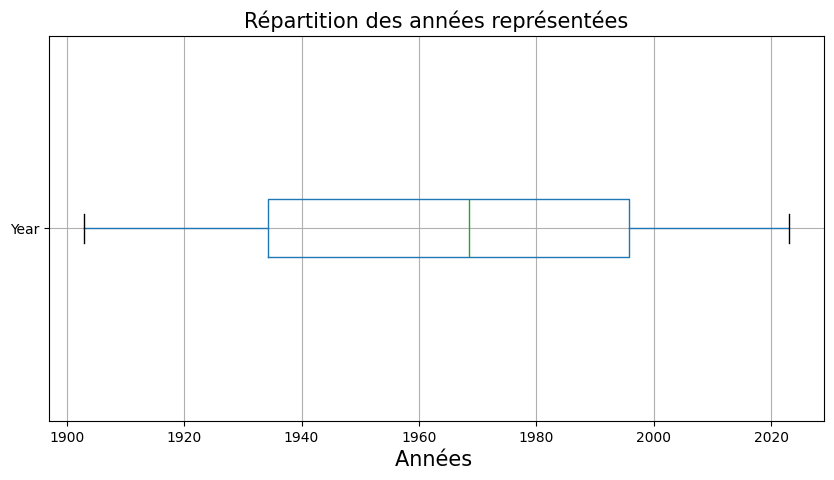

In [33]:
#Affichage de la répartition 
plt.figure(figsize=(10,5))
plt.title("Répartition des années représentées", fontsize=15)
df_twd1.boxplot(column="Year", vert=False, notch= False)
plt.xlabel("Années ", fontsize=15) 
plt.show()

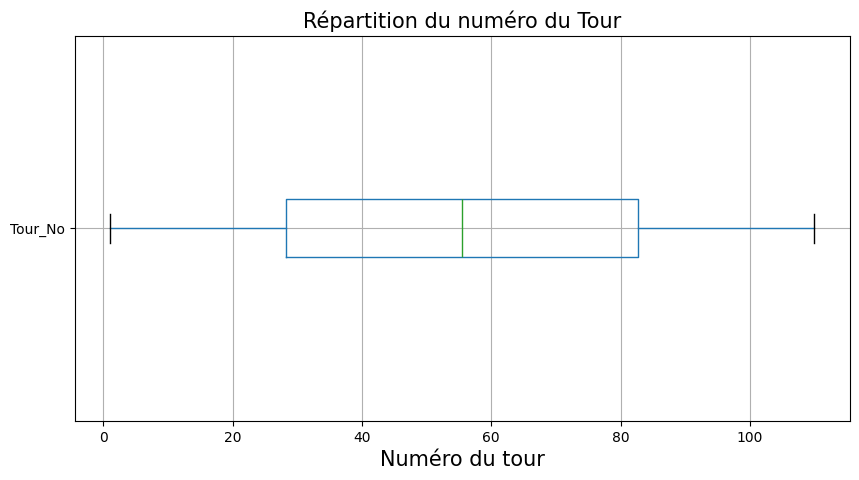

In [34]:
#Affichage de la répartition
plt.figure(figsize=(10,5))
plt.title("Répartition du numéro du Tour", fontsize=15)
df_twd1.boxplot(column="Tour_No", vert=False, notch= False)
plt.xlabel("Numéro du tour", fontsize=15) 
plt.show()

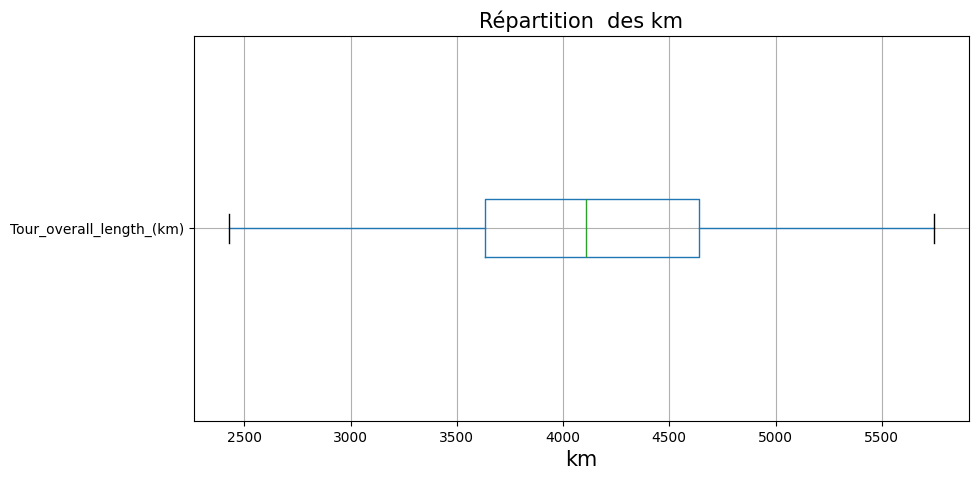

In [35]:
#Affichage de la répartition
plt.figure(figsize=(10,5))
plt.title("Répartition  des km", fontsize=15)
df_twd1.boxplot(column="Tour_overall_length_(km)", vert=False, notch= False)
plt.xlabel("km", fontsize=15) 
plt.show()

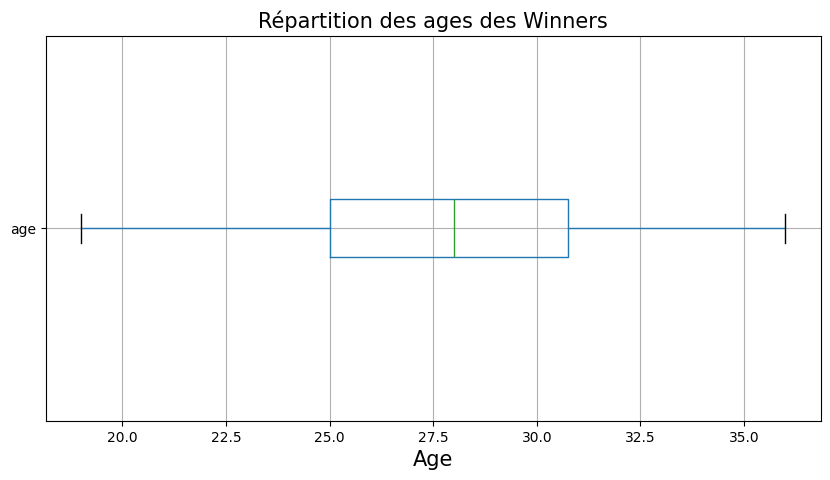

In [36]:
#Affichage de la répartition
plt.figure(figsize=(10,5))
plt.title("Répartition des ages des Winners", fontsize=15)
df_twd1.boxplot(column="age", vert=False, notch= False)
plt.xlabel("Age", fontsize=15) 
plt.show()

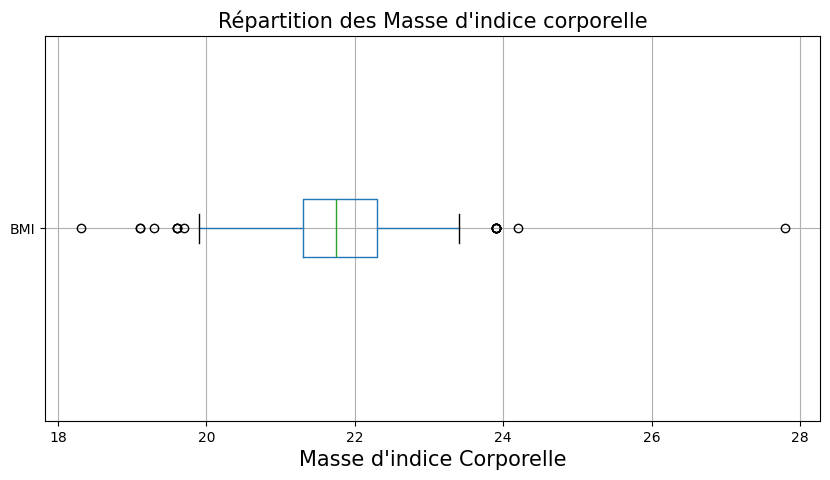

In [37]:
#Affichage de la répartition
plt.figure(figsize=(10,5))
plt.title("Répartition des Masse d'indice corporelle", fontsize=15)
df_twd1.boxplot(column="BMI", vert=False, notch= False)
plt.xlabel("Masse d'indice Corporelle", fontsize=15) 
plt.show()

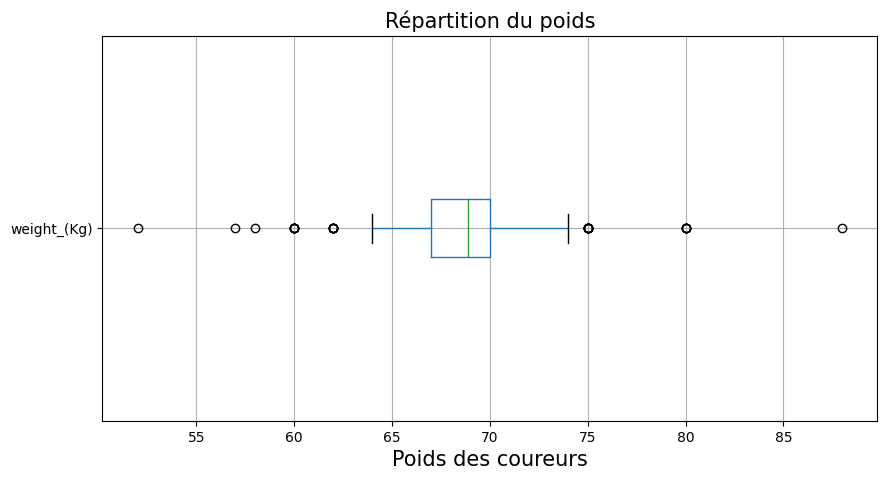

In [38]:
#Affichage de la répartition
plt.figure(figsize=(10,5))
plt.title("Répartition du poids", fontsize=15)
df_twd1.boxplot(column="weight_(Kg)", vert=False, notch= False)
plt.xlabel("Poids des coureurs", fontsize=15) 
plt.show()

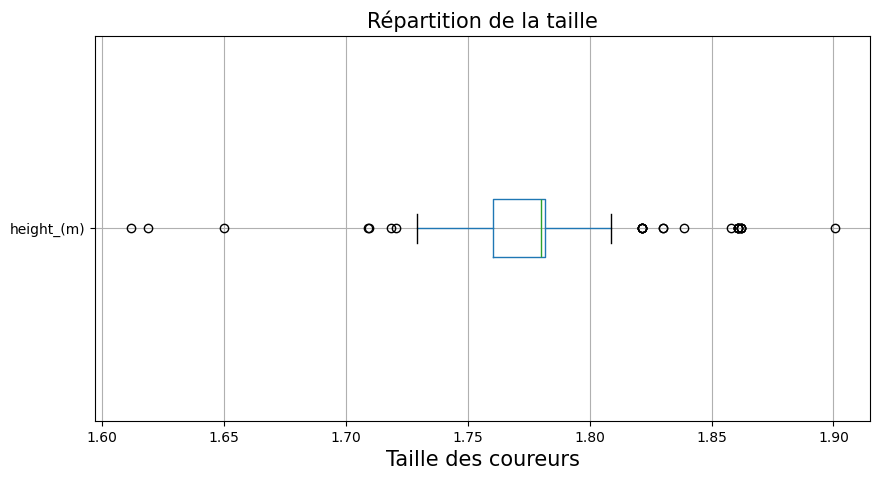

In [39]:
#Affichage de la répartition
plt.figure(figsize=(10,5))
plt.title("Répartition de la taille", fontsize=15)
df_twd1.boxplot(column="height_(m)", vert=False, notch= False)
plt.xlabel("Taille des coureurs", fontsize=15) 
plt.show()

In [40]:
df_twd1.describe(include = 'object')

,Winner,Country,Team,rider_type_(PPS),close_rider_type_(PPS)
count,110,110,110,110,48
unique,65,17,47,3,3
top,Lance armstrong,France,France,sprinter,timetrial
freq,7,36,12,38,21


In [41]:
df_twd2.describe()

,Year,Tour_No,pre_tour_GC_wins,pre_tour_wins,total_completed_stage_races,total_completed_day_races
count,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000
mean,1965.963636,55.500000,1.000000,3.990909,3.400000,6.236364
std,35.215178,31.898276,1.407711,4.833931,2.648177,4.963957
min,1903.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1934.250000,28.250000,0.000000,1.000000,1.000000,3.000000
50%,1968.500000,55.500000,0.000000,3.000000,3.000000,6.000000
75%,1995.750000,82.750000,1.750000,4.000000,6.000000,8.000000
max,2023.000000,110.000000,7.000000,24.000000,11.000000,25.000000


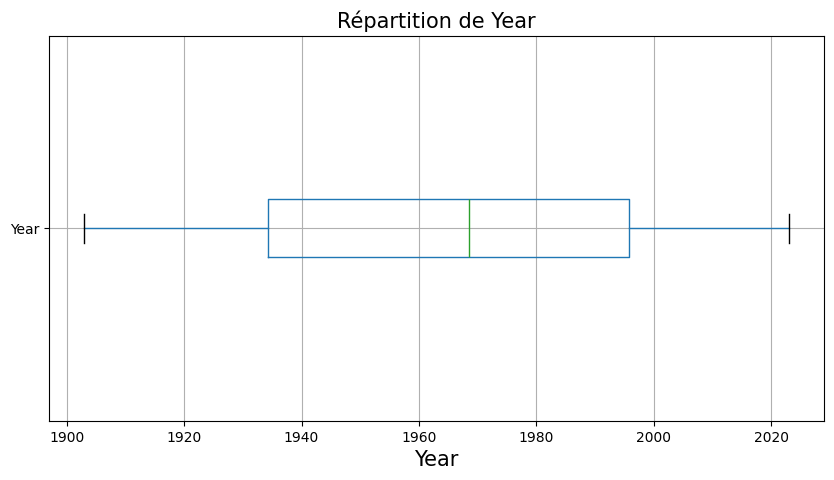

In [42]:
#Affichage de la répartition
plt.figure(figsize=(10,5))
plt.title("Répartition de Year", fontsize=15)
df_twd2.boxplot(column="Year", vert=False, notch= False)
plt.xlabel("Year", fontsize=15) 
plt.show()

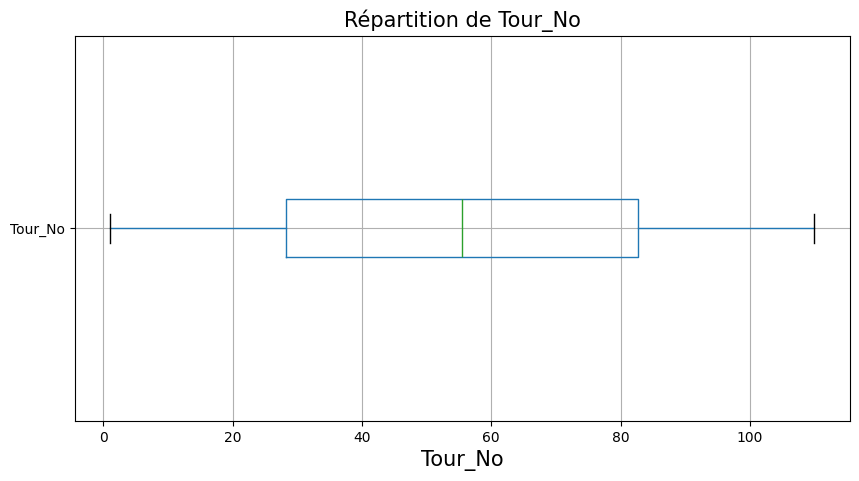

In [43]:
#Affichage de la répartition
plt.figure(figsize=(10,5))
plt.title("Répartition de Tour_No", fontsize=15)
df_twd2.boxplot(column="Tour_No", vert=False, notch= False)
plt.xlabel("Tour_No", fontsize=15) 
plt.show()

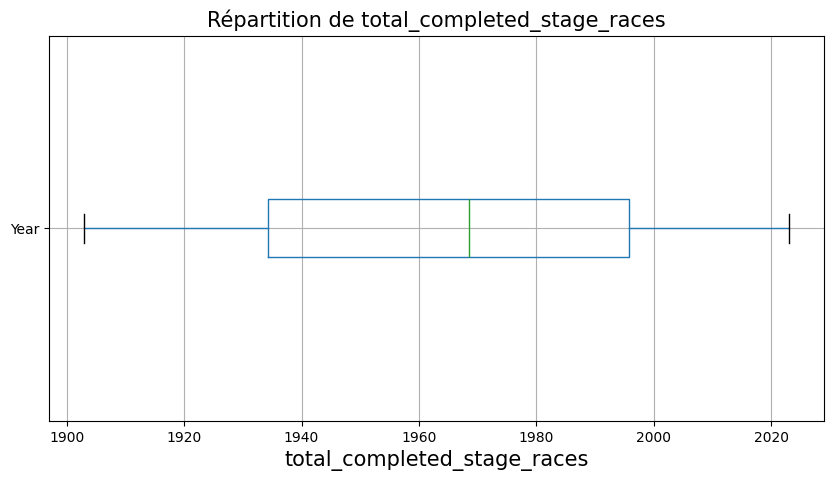

In [44]:
#Affichage de la répartition
plt.figure(figsize=(10,5))
plt.title("Répartition de total_completed_stage_races", fontsize=15)
df_twd2.boxplot(column="Year", vert=False, notch= False)
plt.xlabel("total_completed_stage_races", fontsize=15) 
plt.show()

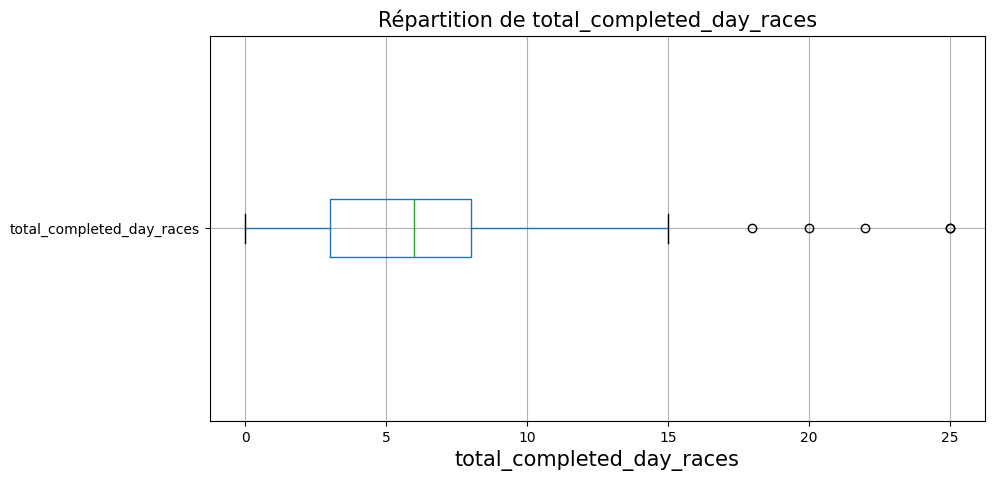

In [45]:
#Affichage de la répartition
plt.figure(figsize=(10,5))
plt.title("Répartition de total_completed_day_races", fontsize=15)
df_twd2.boxplot(column="total_completed_day_races", vert=False, notch= False)
plt.xlabel("total_completed_day_races", fontsize=15) 
plt.show()

In [46]:
df_twd2.describe(include = 'object')

,Winner
count,110
unique,65
top,Lance armstrong
freq,7


In [47]:
df_twd3.describe()

,Year,Tour_No,GT_wins,NAT _TT_wins,NAT_RR_wins,Worlds_RR_ wins
count,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000
mean,1965.963636,55.500000,1.400000,0.100000,0.736364,0.254545
std,35.215178,31.898276,1.991726,0.357104,1.063811,0.549167
min,1903.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1934.250000,28.250000,0.000000,0.000000,0.000000,0.000000
50%,1968.500000,55.500000,1.000000,0.000000,0.000000,0.000000
75%,1995.750000,82.750000,2.000000,0.000000,1.000000,0.000000
max,2023.000000,110.000000,10.000000,2.000000,6.000000,3.000000


In [48]:
df_twd3.describe(include = 'object')

,Winner
count,110
unique,65
top,Lance armstrong
freq,7


### <a name="C336">3.3.6 Rassemblement des dataframes  </a>

In [49]:
merged_df = pd.merge(df_twd1, df_twd2, on=["Year","Tour_No", "Winner"], how="inner") # "inner" signifie une jointure interne

# Fusion de merged_df et df3
df_final= pd.merge(merged_df, df_twd3, on=["Year","Tour_No", "Winner"], how="inner")

### <a name="C337"> 3.3.7 Bilan du nettoyage</a> 

In [50]:
df_final.head()

,Year,Tour_No,Winner,Country,Team,Tour_overall_length_(km),age,BMI,weight_(Kg),height_(m),rider_type_(PPS),close_rider_type_(PPS),pre_tour_GC_wins,pre_tour_wins,total_completed_stage_races,total_completed_day_races,GT_wins,NAT _TT_wins,NAT_RR_wins,Worlds_RR_ wins
0,2023,110,Jonas Vingegaard,Denmark,Team Jumbo Visma,3406,25,19.6,60.0,1.749636,climber,NaN,3,11,5,1,1,0,0,0
1,2022,109,Jonas Vingegaard,Denmark,Team Jumbo Visma,3328,25,19.6,60.0,1.749636,climber,NaN,0,2,4,7,0,0,0,0
2,2021,108,Tadej Pogacar,Slovenia,UAE Team Emirates,3383,22,21.3,66.0,1.760282,climber,NaN,3,4,4,7,1,1,1,0
3,2020,107,Tadej Pogacar,Slovenia,UAE Team Emirates,3482,21,21.3,66.0,1.760282,climber,NaN,1,4,3,6,0,1,1,0
4,2019,106,Egan Bernal,Colombia,Team Ineos,3366,22,19.6,60.0,1.749636,climber,NaN,2,1,4,7,0,0,0,0


In [51]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Year                          110 non-null    int64  
 1   Tour_No                       110 non-null    int64  
 2   Winner                        110 non-null    object 
 3   Country                       110 non-null    object 
 4   Team                          110 non-null    object 
 5   Tour_overall_length_(km)      110 non-null    int32  
 6   age                           110 non-null    int64  
 7   BMI                           110 non-null    float64
 8   weight_(Kg)                   110 non-null    float64
 9   height_(m)                    110 non-null    float64
 10  rider_type_(PPS)              110 non-null    object 
 11  close_rider_type_(PPS)        48 non-null     object 
 12  pre_tour_GC_wins              110 non-null    int64  
 13  pre_t

# 4 Analyses

## <a name="C41">4.1 Analyses multivarées</a>

### <a name="C411">4.1.1 Variables numériques </a>

In [52]:
#Création d'un dataframe qu'avec les colonnes numériques

numeric_columns = df_final.select_dtypes(include=['int64','int32', 'float64'])

df_final_num = df_final[numeric_columns.columns]

df_final_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Year                          110 non-null    int64  
 1   Tour_No                       110 non-null    int64  
 2   Tour_overall_length_(km)      110 non-null    int32  
 3   age                           110 non-null    int64  
 4   BMI                           110 non-null    float64
 5   weight_(Kg)                   110 non-null    float64
 6   height_(m)                    110 non-null    float64
 7   pre_tour_GC_wins              110 non-null    int64  
 8   pre_tour_wins                 110 non-null    int64  
 9   total_completed_stage_races   110 non-null    int64  
 10  total_completed_day_races     110 non-null    int64  
 11  GT_wins                       110 non-null    int64  
 12  NAT _TT_wins                  110 non-null    int64  
 13  NAT_R

#### <a name="C4111">4.1.1.1 Corrélation </a>

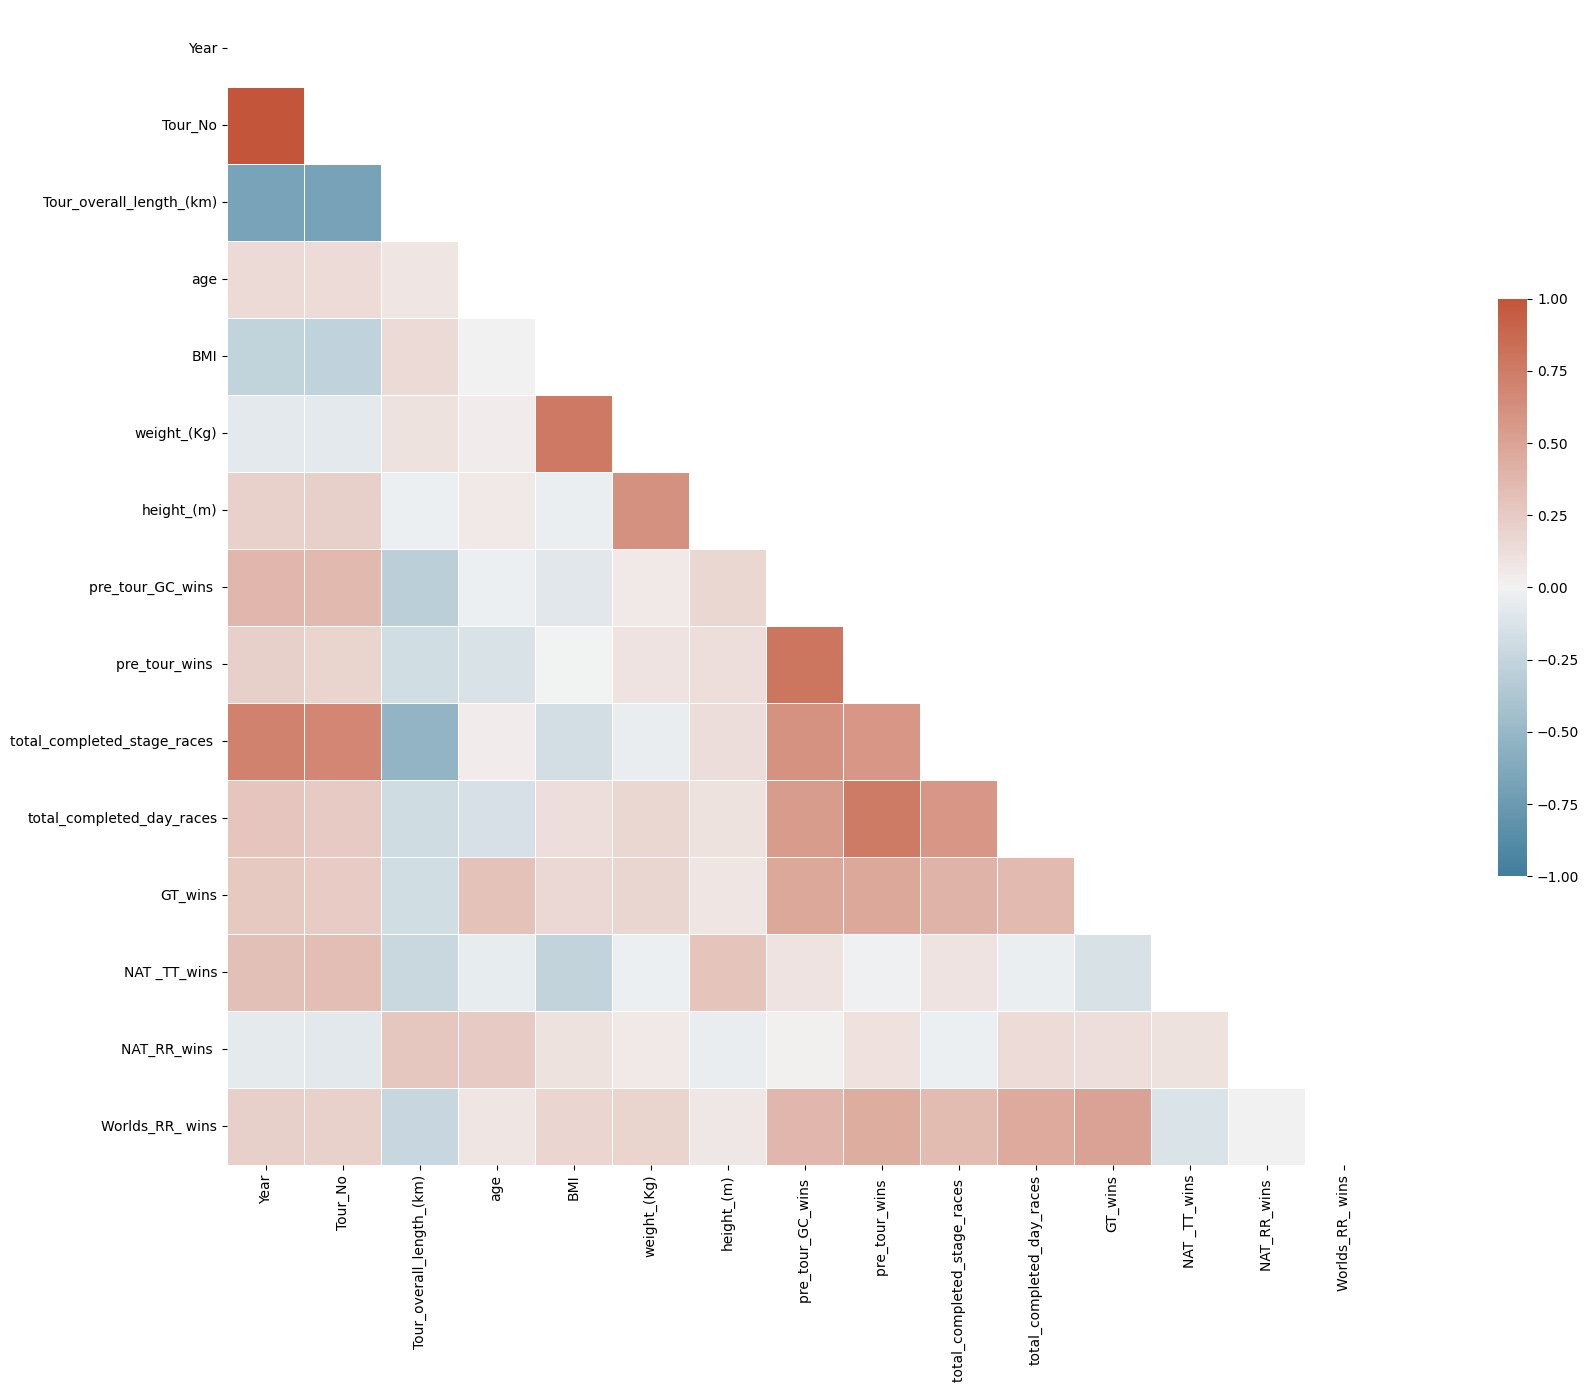

In [53]:
correlation(df_final_num)

In [54]:
# Recherche de la corrélation avec la TARGET
correlations = df_final_num.corr()['BMI'].sort_values(ascending = False)


print('\nCorrelation avec BMI:\n', correlations)


Correlation avec BMI:
 BMI                             1.000000
weight_(Kg)                     0.765977
Worlds_RR_ wins                 0.184291
GT_wins                         0.158784
Tour_overall_length_(km)        0.149289
total_completed_day_races       0.121802
NAT_RR_wins                     0.097362
age                             0.007240
pre_tour_wins                  -0.000454
height_(m)                     -0.031863
pre_tour_GC_wins               -0.089929
total_completed_stage_races    -0.171213
NAT _TT_wins                   -0.263747
Year                           -0.268185
Tour_No                        -0.278918
Name: BMI, dtype: float64


### <a name="C412">4.1.2 Variables catégorielles (méthode CHI2)</a>

In [55]:
df_final.describe(include = 'object')

,Winner,Country,Team,rider_type_(PPS),close_rider_type_(PPS)
count,110,110,110,110,48
unique,65,17,47,3,3
top,Lance armstrong,France,France,sprinter,timetrial
freq,7,36,12,38,21


In [56]:
#Création d'un dataframe qu'avec les colonnes objets

obj_columns = df_final.select_dtypes(include=['object'])

df_final_obj = df_final[obj_columns.columns]

df_final_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Winner                  110 non-null    object
 1   Country                 110 non-null    object
 2   Team                    110 non-null    object
 3   rider_type_(PPS)        110 non-null    object
 4   close_rider_type_(PPS)  48 non-null     object
dtypes: object(5)
memory usage: 4.4+ KB


#### <a name="C4121">4.1.2.1 TARGET vs CODE_GENDER </a>    

rider_type_(PPS),climber,sprinter,timetrial,Total
Winner,,,,
Alberto Contador,2.0,NaN,NaN,2
Andre Leducq,NaN,2.0,NaN,2
Andy Schleck,1.0,NaN,NaN,1
Antonin Magne,NaN,2.0,NaN,2
Bernard Hinault,NaN,NaN,5.0,5
Bernard Thevenet,NaN,NaN,2.0,2
Bjarne Riis,1.0,NaN,NaN,1
Bradley Wiggins,NaN,NaN,1.0,1
Cadel Evans,1.0,NaN,NaN,1


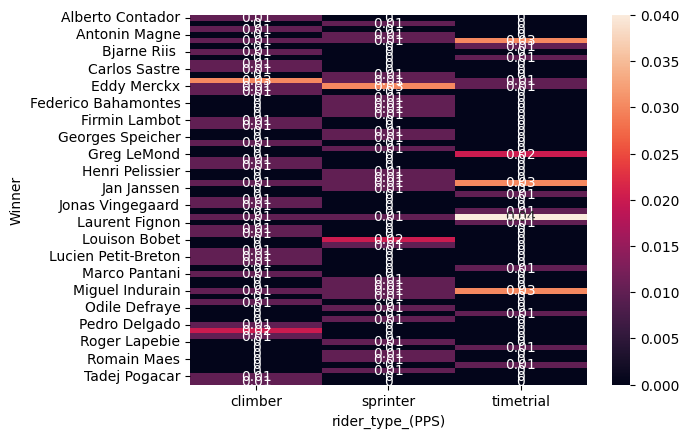

In [57]:
chi02(df_final_obj, "Winner","rider_type_(PPS)")

### <a name="C413">4.1.3 Variables numériques vs catégorielles (méthode ANOVA) </a>

#### <a name="C4131">4.1.3.1 age' vs 'rider_type_(PPS) </a>

In [58]:
#Calcul du rapport de corrélation
eta_squared(df_final['age'],df_final['rider_type_(PPS)'])

0.004224746155200436

## <a name="C42">4.2 Analyses univariées </a>

### <a name="C421">4.2.1 Variables numériques</a>

#### <a name="C4211">4.2.1.1 age</a>

##### <a name="C42121">4.2.1.1.1 Mesures de tendances centrales et de dispersions</a>

In [59]:
print("moy:\n",df_final['age'].mean())
print("med:\n",df_final['age'].median())
print("mod:\n",df_final['age'].mode())

moy:
 28.118181818181817
med:
 28.0
mod:
 0    28
Name: age, dtype: int64


In [60]:
#Mesure de dispersion :
print("Ecart type:\n",df_final['age'].std(ddof=0)) #Ecart type empirique
print("Var:\n",df_final['age'].var(ddof=0)) #Variance empirique
print("Coefficient de variation CV :",df_final['age'].std()/df_final['age'].mean())

Ecart type:
 3.6574502250557464
Var:
 13.376942148760328
Coefficient de variation CV : 0.1306695162190403


In [61]:
data_tmp=df_final['age']
data_tmp.describe()

count    110.000000
mean      28.118182
std        3.674189
min       19.000000
25%       25.000000
50%       28.000000
75%       30.750000
max       36.000000
Name: age, dtype: float64

##### <a name="C42112">4.2.1.1.2 Visualisations</a>

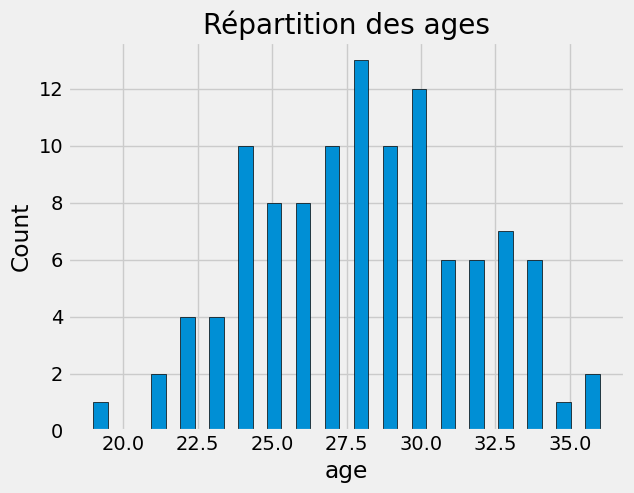

In [62]:
plt.style.use('fivethirtyeight')

#Visualisation de la distribution
plt.hist(df_final['age'], edgecolor = 'k', bins = 35)
plt.title('Répartition des ages'); plt.xlabel('age'); plt.ylabel('Count');

#### <a name="C4212">4.2.1.2 BMI</a>

##### <a name="C42121">4.2.1.2.1 Mesures de tendances centrales et de dispersions</a>

In [63]:
print("moy:\n",df_final['BMI'].mean())
print("med:\n",df_final['BMI'].median())
print("mod:\n",df_final['BMI'].mode())

moy:
 21.769994950132546
med:
 21.745991667718723
mod:
 0    21.745992
Name: BMI, dtype: float64


In [64]:
#Mesure de dispersion :
print("Ecart type:\n",df_final['BMI'].std(ddof=0)) #Ecart type empirique
print("Var:\n",df_final['BMI'].var(ddof=0)) #Variance empirique
print("Coefficient de variation CV :",df_final['BMI'].std()/df_final['BMI'].mean())

Ecart type:
 1.3113295568665897
Var:
 1.7195852067119264
Coefficient de variation CV : 0.06051131842284457


In [65]:
data_tmp=df_final['BMI']
data_tmp.describe()

count    110.000000
mean      21.769995
std        1.317331
min       18.305769
25%       21.300000
50%       21.745992
75%       22.300000
max       27.800000
Name: BMI, dtype: float64

##### <a name="C42122">4.2.1.2.2 Visualisations</a>

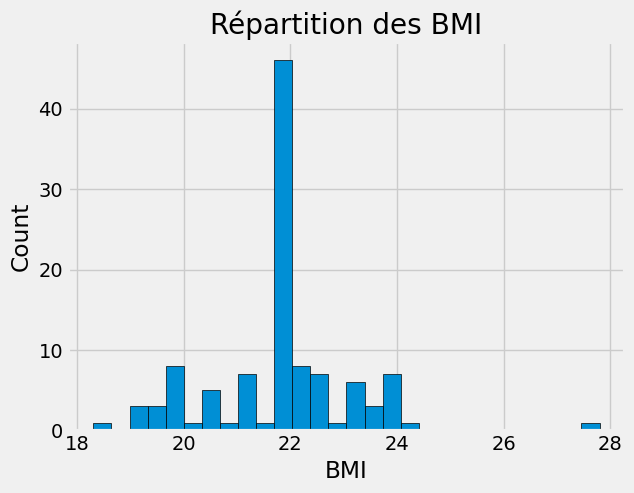

In [66]:
plt.style.use('fivethirtyeight')

#Visualisation de la distribution
plt.hist(df_final['BMI'], edgecolor = 'k', bins = 28)
plt.title('Répartition des BMI'); plt.xlabel('BMI'); plt.ylabel('Count');

#### <a name="C4213">4.2.1.3 Weight_(Kg)</a>

##### <a name="C42131">4.2.1.3.1 Mesures de tendances centrales et de dispersions</a>

In [67]:
print("moy:\n",df_final['weight_(Kg)'].mean())
print("med:\n",df_final['weight_(Kg)'].median())
print("mod:\n",df_final['weight_(Kg)'].mode())

moy:
 68.90090909090907
med:
 68.9
mod:
 0    68.9
Name: weight_(Kg), dtype: float64


In [68]:
#Mesure de dispersion :
print("Ecart type:\n",df_final['weight_(Kg)'].std(ddof=0)) #Ecart type empirique
print("Var:\n",df_final['weight_(Kg)'].var(ddof=0)) #Variance empirique
print("Coefficient de variation CV :",df_final['weight_(Kg)'].std()/df_final['weight_(Kg)'].mean())

Ecart type:
 5.267662849957888
Var:
 27.74827190082646
Coefficient de variation CV : 0.07680263355780993


In [69]:
data_tmp=df_final['weight_(Kg)']
data_tmp.describe()

count    110.000000
mean      68.900909
std        5.291771
min       52.000000
25%       67.000000
50%       68.900000
75%       70.000000
max       88.000000
Name: weight_(Kg), dtype: float64

##### <a name="C42132">4.2.1.3.2 Visualisations</a>

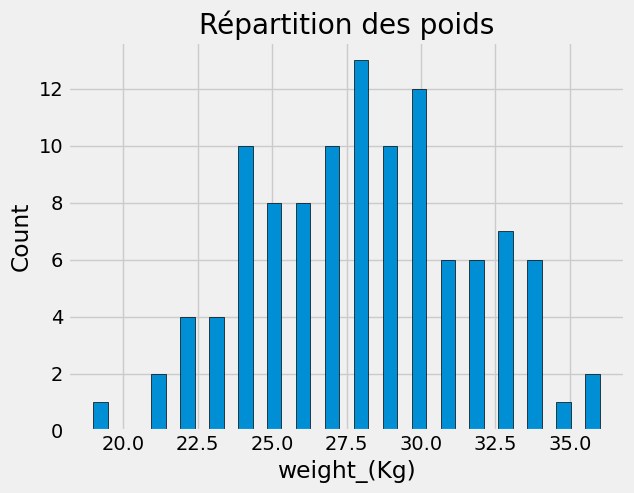

In [70]:
plt.style.use('fivethirtyeight')

#Visualisation de la distribution
plt.hist(df_final['age'], edgecolor = 'k', bins = 35)
plt.title('Répartition des poids'); plt.xlabel('weight_(Kg)'); plt.ylabel('Count');

#### <a name="C4214">4.2.1.4 height</a>

##### <a name="C42141">4.2.1.4.1 Mesures de tendances centrales et de dispersions</a>

In [71]:
print("moy:\n",df_final['height_(m)'].mean())
print("med:\n",df_final['height_(m)'].median())
print("mod:\n",df_final['height_(m)'].mode())

moy:
 1.7785665618636366
med:
 1.78
mod:
 0    1.78
Name: height_(m), dtype: float64


In [72]:
#Mesure de dispersion :
print("Ecart type:\n",df_final['height_(m)'].std(ddof=0)) #Ecart type empirique
print("Var:\n",df_final['height_(m)'].var(ddof=0)) #Variance empirique
print("Coefficient de variation CV :",df_final['height_(m)'].std()/df_final['height_(m)'].mean())

Ecart type:
 0.04444952108075381
Var:
 0.0019757599243083778
Coefficient de variation CV : 0.02510614637847806


In [73]:
data_tmp=df_final['height_(m)']
data_tmp.describe()

count    110.000000
mean       1.778567
std        0.044653
min        1.611646
25%        1.760282
50%        1.780000
75%        1.781465
max        1.900675
Name: height_(m), dtype: float64

##### <a name="C42142">4.2.1.4.2 Visualisations</a>

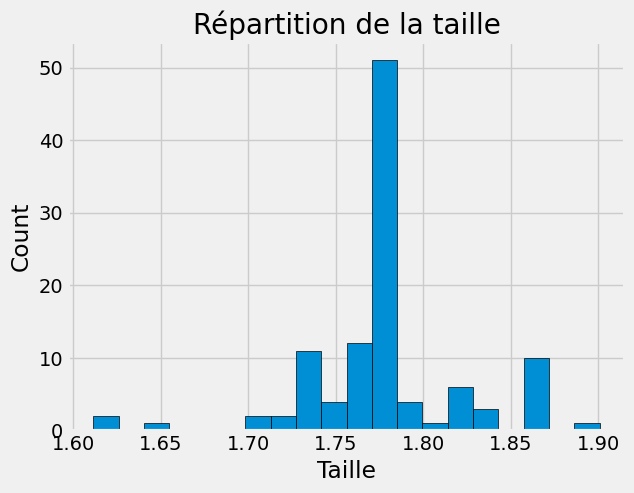

In [74]:
plt.style.use('fivethirtyeight')

#Visualisation de la distribution
plt.hist(df_final['height_(m)'], edgecolor = 'k', bins =20 )
plt.title('Répartition de la taille'); plt.xlabel('Taille'); plt.ylabel('Count');

### 4.2.2 Variables catégorielles

#### <a name="C4221">4.2.2.1 Winner </a>

Winner
Lance armstrong        0.063636
Miguel Indurain        0.045455
Jacques Anquetil       0.045455
Bernard Hinault        0.045455
Eddy Merckx            0.045455
Chris Froome           0.036364
Greg LeMond            0.027273
Louison Bobet          0.027273
Philippe Thys          0.027273
Laurent Fignon         0.018182
Bernard Thevenet       0.018182
Jonas Vingegaard       0.018182
Nicolas Frantz         0.018182
Antonin Magne          0.018182
Tadej Pogacar          0.018182
Sylvere Maes           0.018182
Fausto Coppi           0.018182
Andre Leducq           0.018182
Ottavio Bottecchia     0.018182
Gino Bartali           0.018182
Firmin Lambot          0.018182
Alberto Contador       0.018182
Lucien Petit-Breton    0.018182
Romain Maes            0.009091
Henri Cornet           0.009091
Louis Trousselier      0.009091
Jean Robic             0.009091
Rene Pottier           0.009091
Roger Lapebie          0.009091
Francois Faber         0.009091
Ferdinand Kubler       0.009091
H

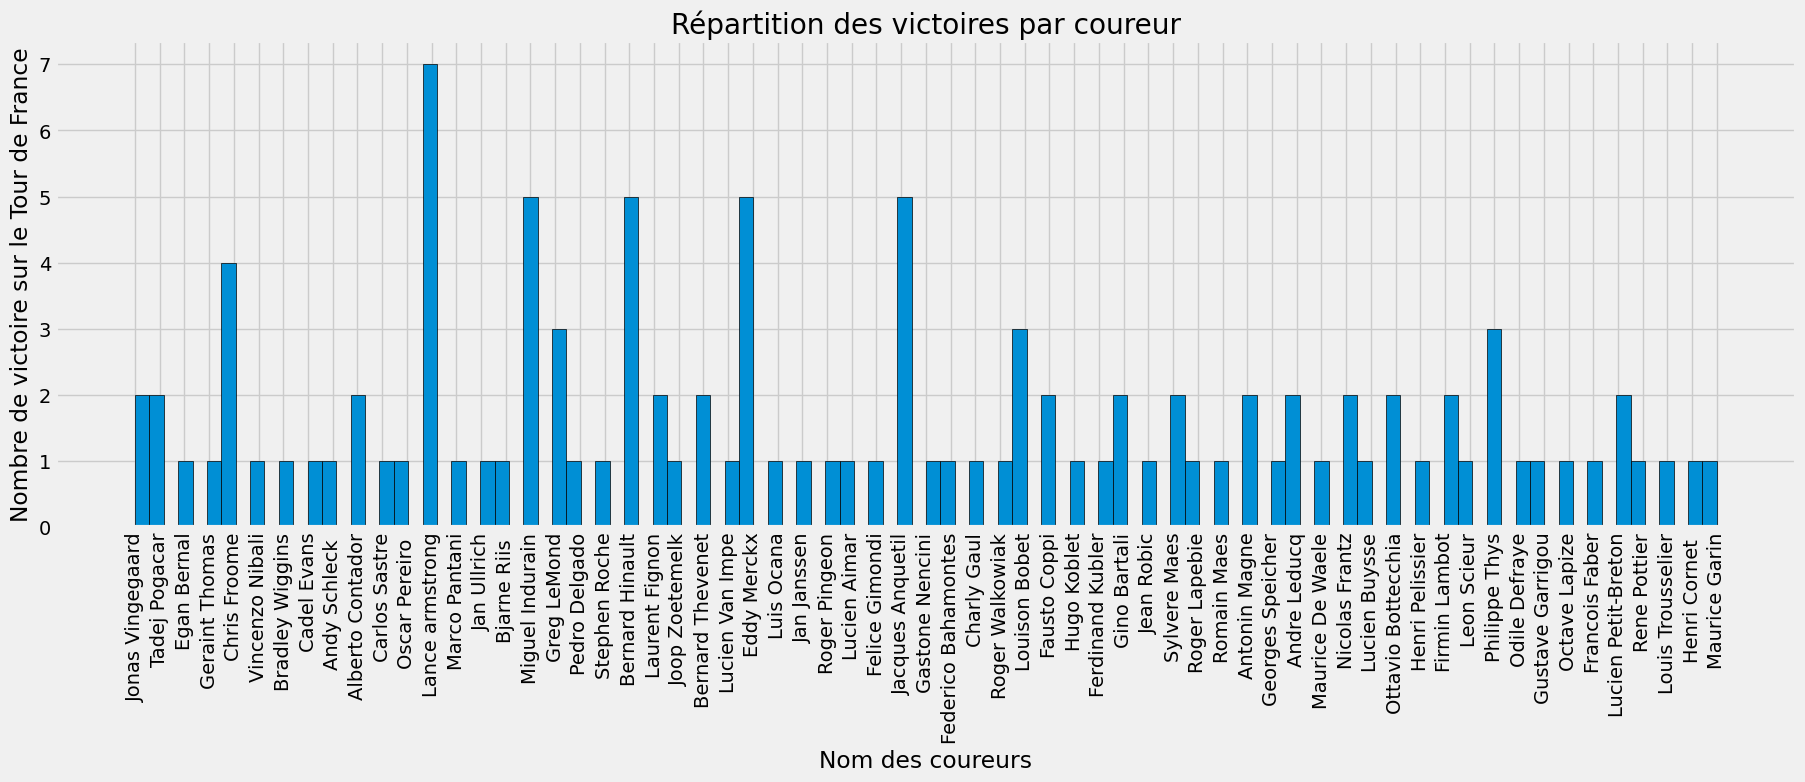

In [75]:
print(df_final['Winner'].value_counts(normalize=True))

plt.style.use('fivethirtyeight')
#Visualisation de la distribution
plt.figure(figsize=(20, 6))
plt.hist(df_final['Winner'], edgecolor = 'k', bins = 110)
plt.xticks(rotation=90)
plt.title('Répartition des victoires par coureur'); plt.xlabel('Nom des coureurs'); plt.ylabel('Nombre de victoire sur le Tour de France');

#### <a name="C4222">4.2.2.2 Country </a>

Country
France            0.327273
Belgium           0.163636
Spain             0.109091
Italy             0.090909
USA               0.063636
United Kingdom    0.054545
Luxembourg        0.045455
United States     0.027273
Netherlands       0.018182
Denmark           0.018182
Slovenia          0.018182
Switzerland       0.018182
Dnmark            0.009091
Germany           0.009091
Ireland           0.009091
Australia         0.009091
Colombia          0.009091
Name: proportion, dtype: float64


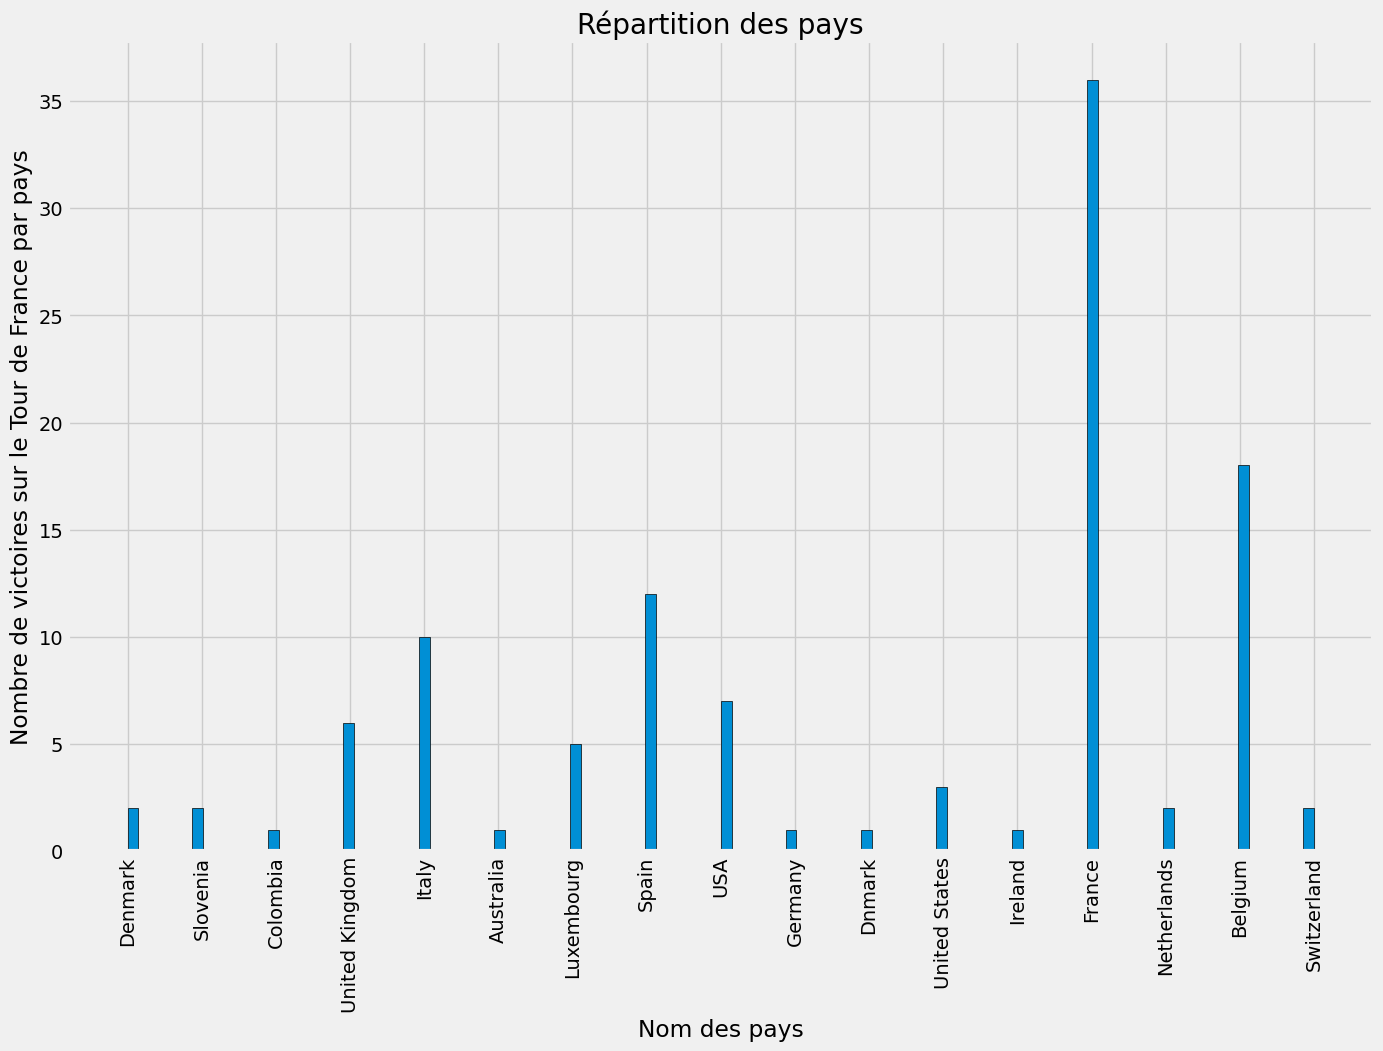

In [76]:
print(df_final['Country'].value_counts(normalize=True))

plt.style.use('fivethirtyeight')
#Visualisation de la distribution
plt.figure(figsize=(15, 10))
plt.hist(df_final['Country'], edgecolor = 'k', bins = 110)
plt.xticks(rotation=90)
plt.title('Répartition des pays'); plt.xlabel('Nom des pays'); plt.ylabel('Nombre de victoires sur le Tour de France par pays');


#### <a name="C4223">4.2.2.3 Team </a>

Team
France                0.109091
Cycles Peugeot        0.063636
Renault               0.054545
Team Sky              0.054545
US Postal Service     0.054545
Italy                 0.045455
Banesto               0.045455
Automoto              0.036364
Alycon                0.036364
Molteni               0.027273
Belgium               0.027273
La Sportive           0.027273
St-Raphael            0.027273
Alcyon                0.027273
La Vie Claire         0.018182
UAE Team Emirates     0.018182
Peugeot               0.018182
Team Jumbo Visma      0.018182
Switzerland           0.018182
Telekom               0.018182
Discovery Channel     0.018182
Spain                 0.009091
Holland Luxembourg    0.009091
Nord Est Centre       0.009091
Ouest                 0.009091
Cycles JC             0.009091
Salvarini             0.009091
Ford                  0.009091
Gitane                0.009091
Holland               0.009091
Faema                 0.009091
Team Ineos            0.009091
Ast

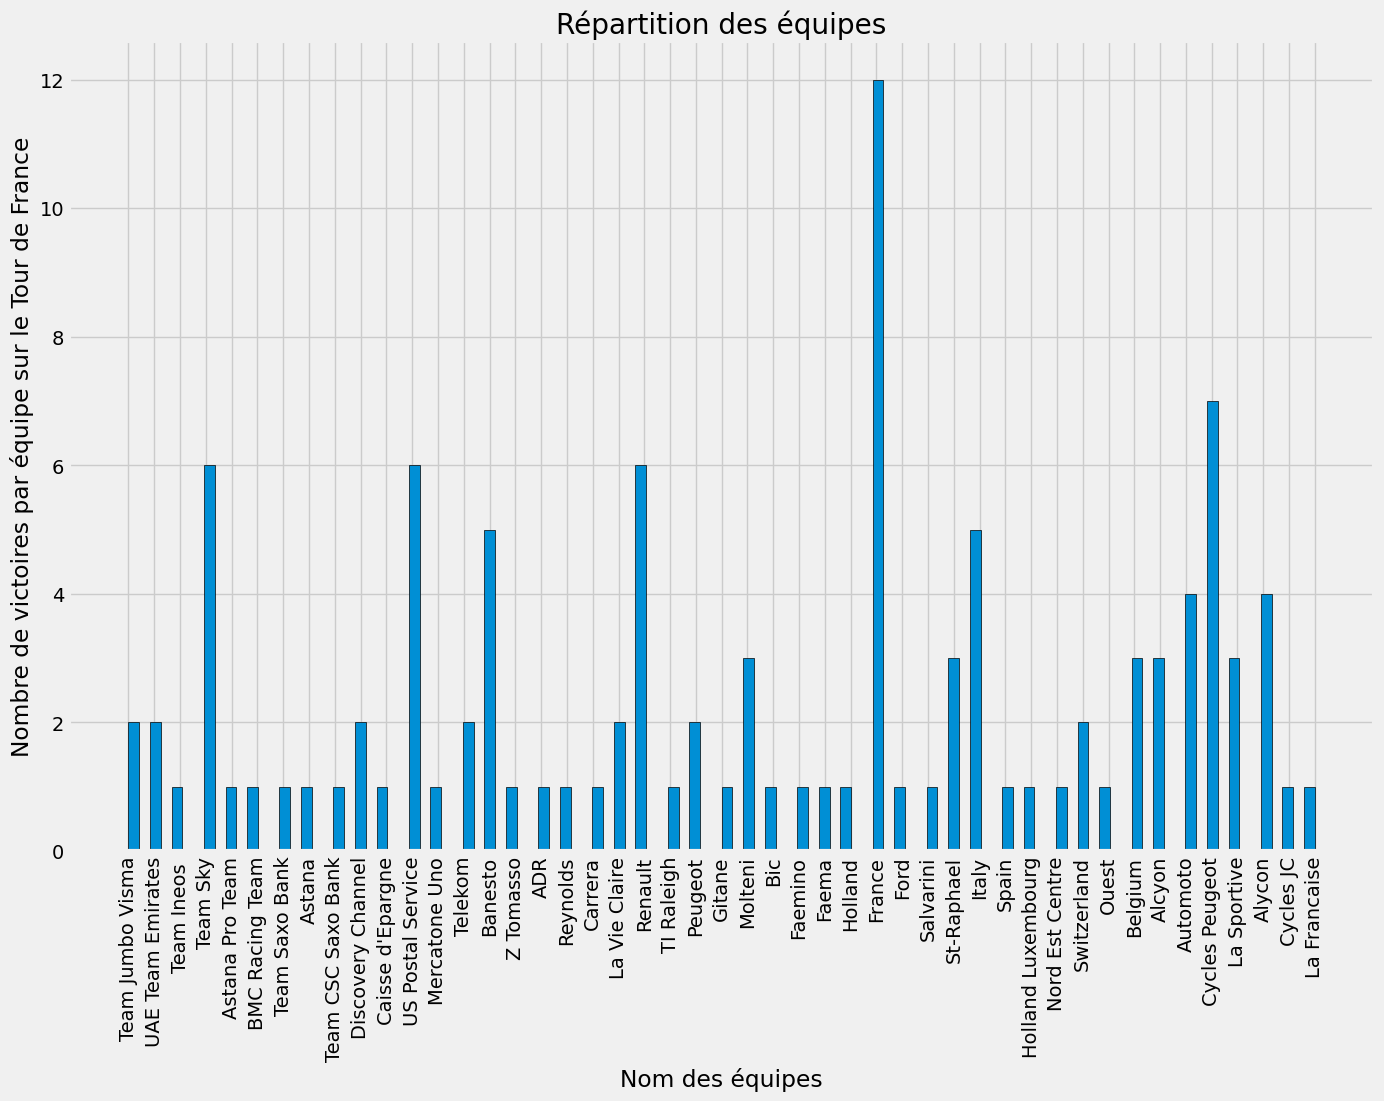

In [77]:
print(df_final['Team'].value_counts(normalize=True))

plt.style.use('fivethirtyeight')
#Visualisation de la distribution
plt.figure(figsize=(15, 10))
plt.hist(df_final['Team'], edgecolor = 'k', bins = 110)
plt.xticks(rotation=90)
plt.title('Répartition des équipes'); plt.xlabel('Nom des équipes'); plt.ylabel('Nombre de victoires par équipe sur le Tour de France');

#### <a name="C4224">4.2.2.4 Rider_type_(PPS) </a>

rider_type_(PPS)
sprinter     0.345455
climber      0.327273
timetrial    0.327273
Name: proportion, dtype: float64


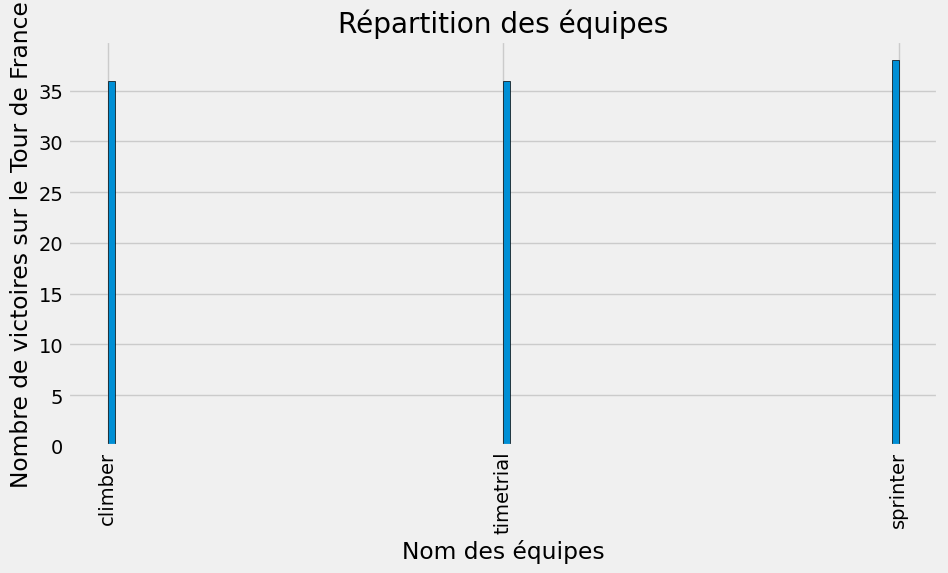

In [78]:
print(df_final['rider_type_(PPS)'].value_counts(normalize=True))

plt.style.use('fivethirtyeight')
#Visualisation de la distribution
plt.figure(figsize=(10, 5))
plt.hist(df_final['rider_type_(PPS)'], edgecolor = 'k', bins = 110)
plt.xticks(rotation=90)
plt.title('Répartition des équipes'); plt.xlabel('Nom des équipes'); plt.ylabel('Nombre de victoires sur le Tour de France');

# 5. Conclusion

L'échantillon ici est trop petit pour créer un modèle de ML fiable. Je propose donc de prendre le même jeu de données mais avec tous les courreurs et pas sulement les gagnants afin de pouvoir créer un modèle de prédiction sur le classement d'un coureur dans une futur épreuve

# FIN